In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [76]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [77]:
train.shape

(1168, 81)

In [78]:
#train.isnull().sum()
nans=pd.isnull(train).sum()
nans[nans>0]


LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

there are many missing values in the dataset. We need to figure out the effect of these missing values on the house price.

In [79]:
# filtering the features with missing values
missing_val_feat=[features for features in train.columns if train[features].isnull().sum()>1]

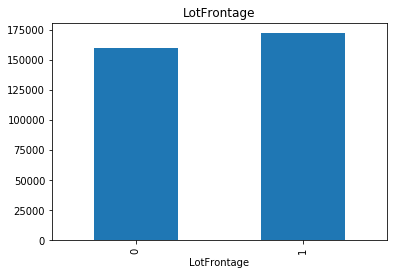

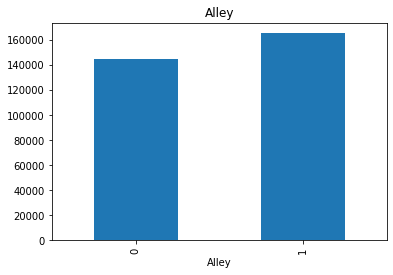

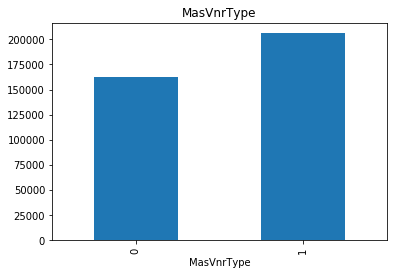

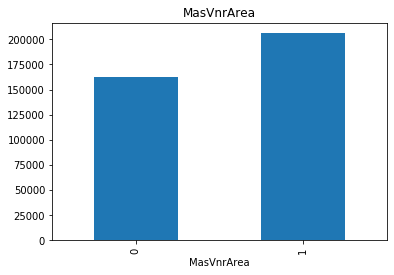

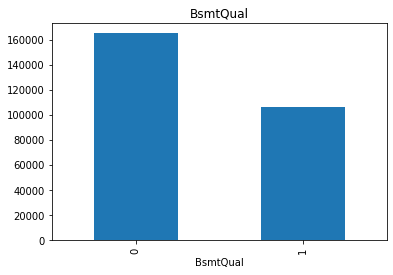

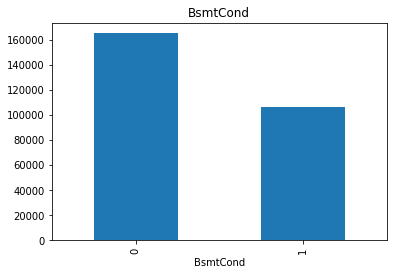

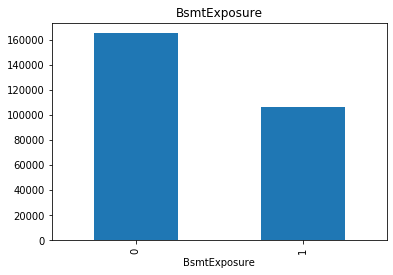

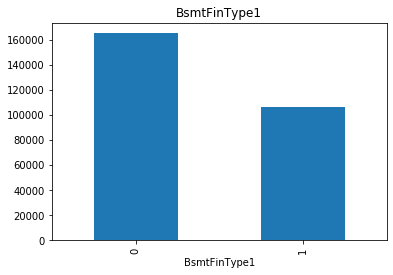

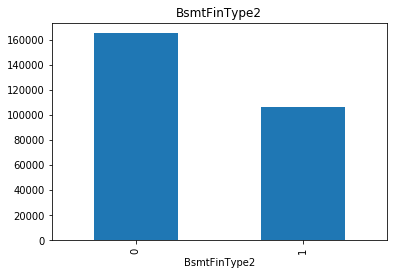

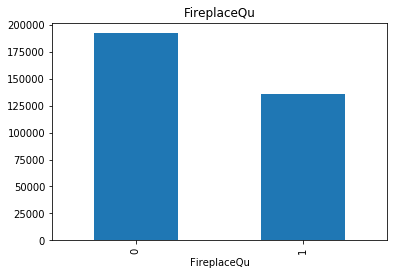

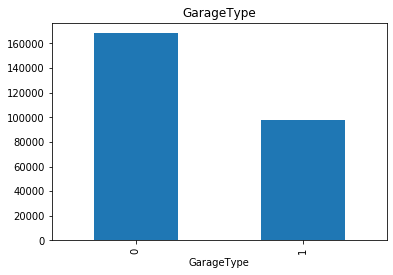

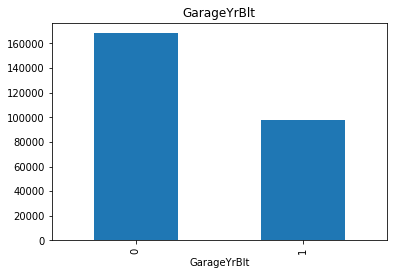

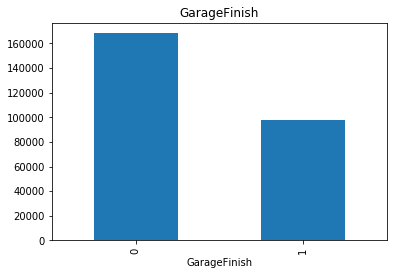

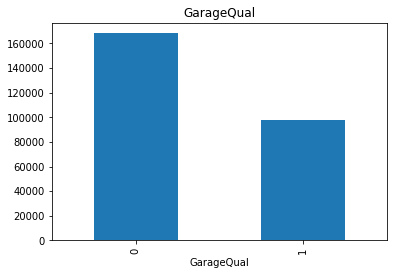

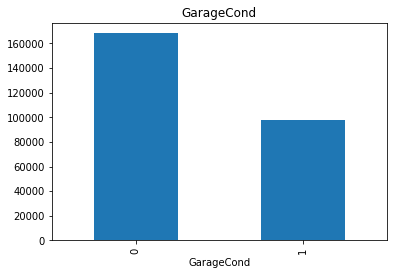

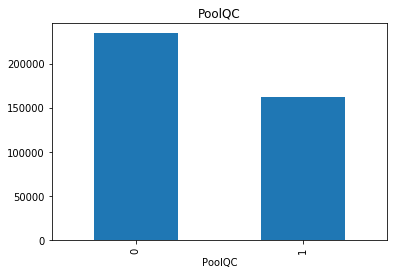

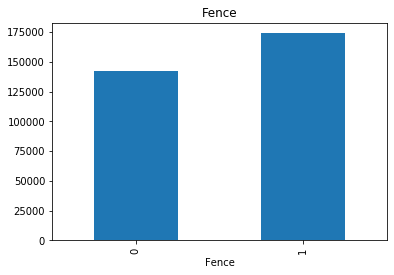

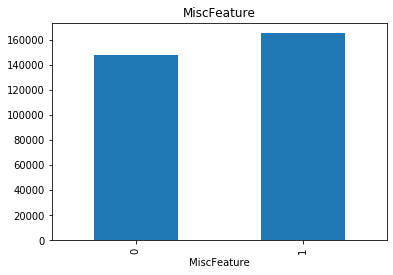

In [80]:
for feature in missing_val_feat:
    # we are going to change the dataframe so we are making a copy of dataframe
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # average sale price
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

We will replace the columns having missing values more than 1000.

In [81]:
train.drop(["Alley","PoolQC","MiscFeature"], axis = 1, inplace = True)
test.drop(["Alley","PoolQC","MiscFeature"], axis = 1, inplace = True)

In [82]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Now we will analyze the average or median house price of each year.

Text(0.5, 1.0, 'House Price vs YearSold')

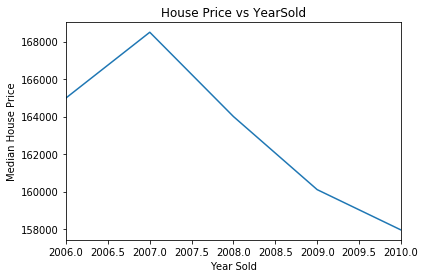

In [83]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

As we can see the house price is decreasing with time.

In [84]:
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

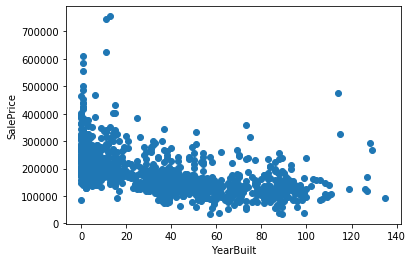

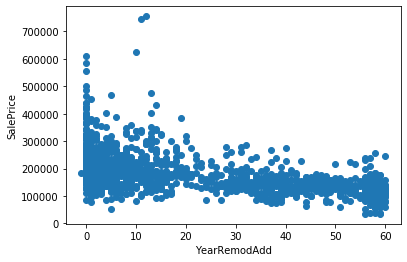

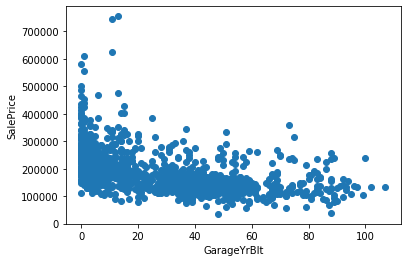

In [85]:
for feature in year_features:
    if feature!='YrSold':
        data=train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

As we can see from the graphs above that the price of newly build house is more. Not only year built we have also compared the variation of house price on the bases of built year of garage and remodification of the house. In all the cases, the price is high if the age is less and price decresing with the age house, garage and remodification.

There are two types of numerical variables, continuous and discrete. Discrete numerical variables can be considered as categorical variables if it has less number of unique values. Now we will figure out the variables which can be considered as categorical variables.

In [86]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
discrete_variable=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_features+['Id']]
discrete_variable

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

Now we will plot each and every feature with the house price to see the relationship between them.

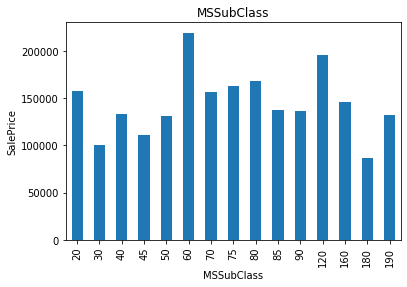

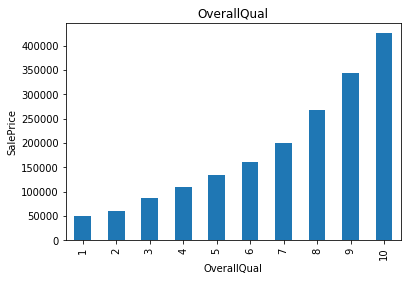

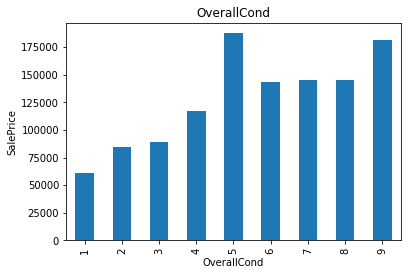

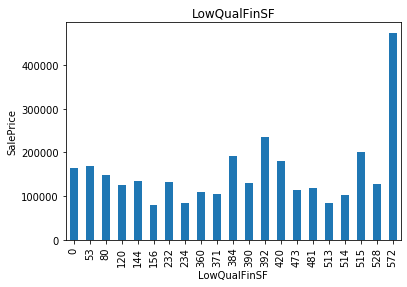

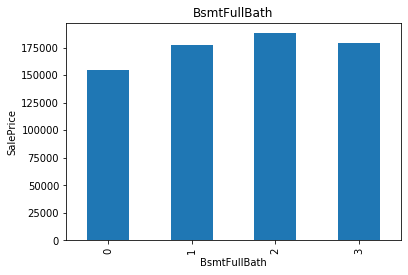

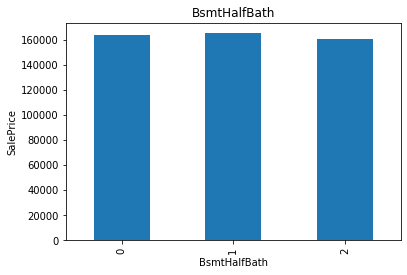

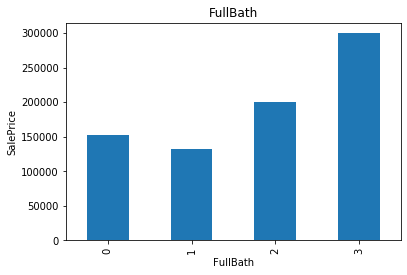

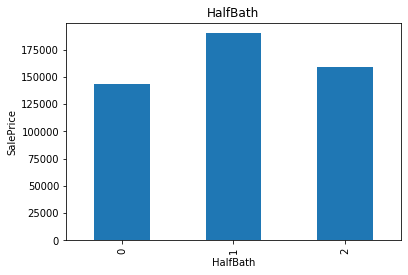

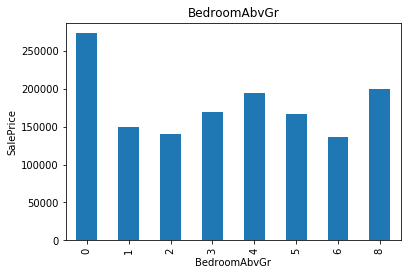

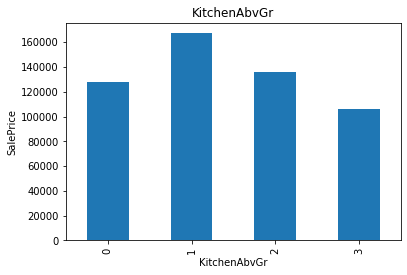

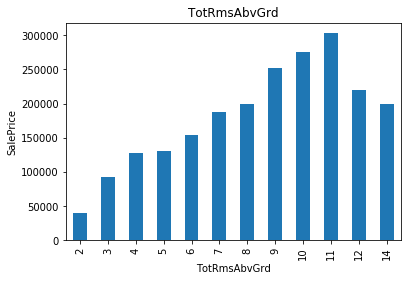

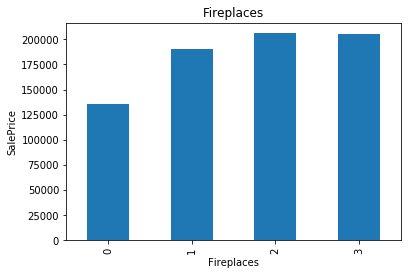

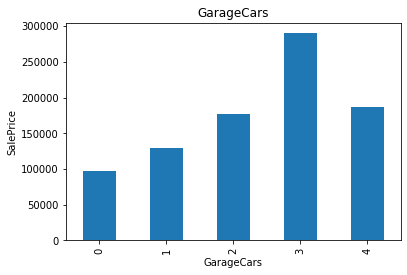

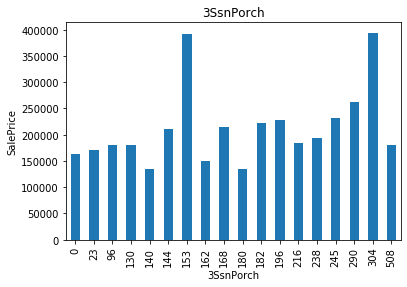

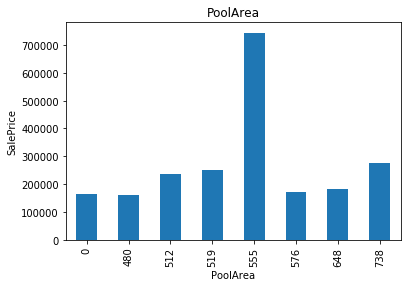

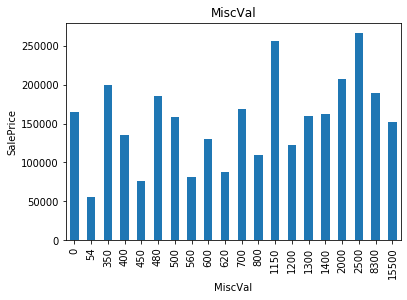

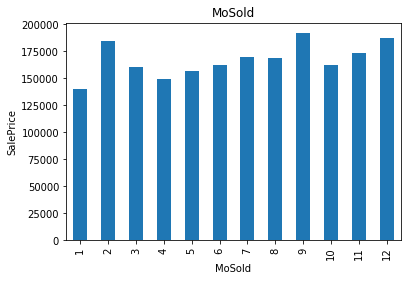

In [87]:
for feature in discrete_variable:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Now we will filter the continous variables and will analyze the variation of the price with house price.

In [88]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_variable+year_features+['Id']]
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

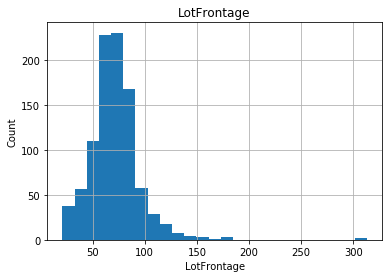

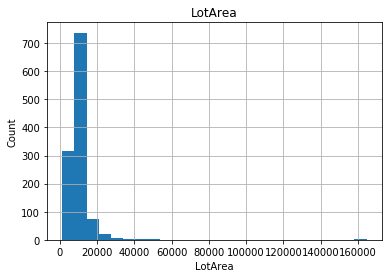

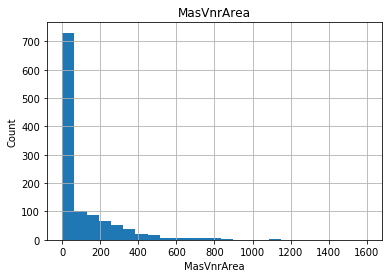

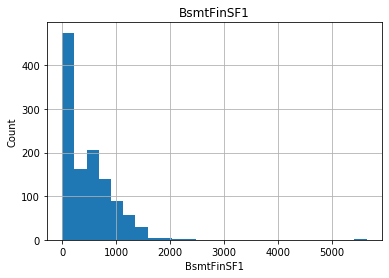

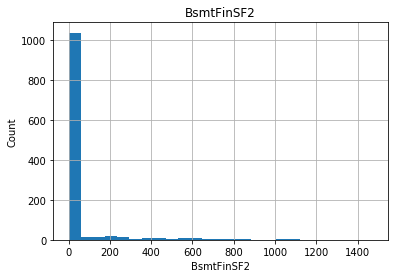

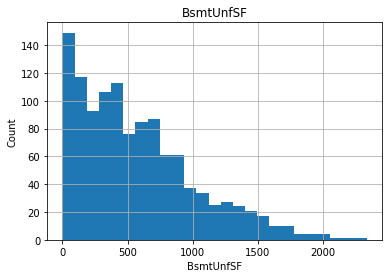

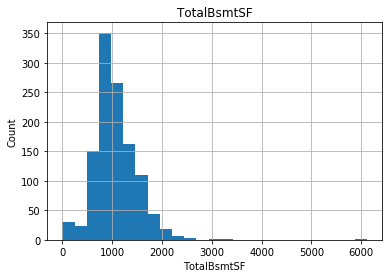

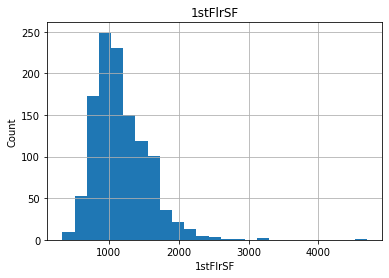

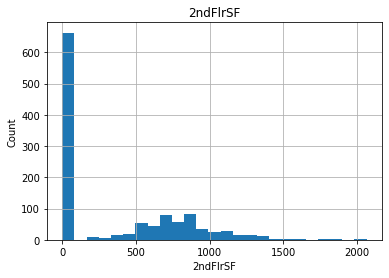

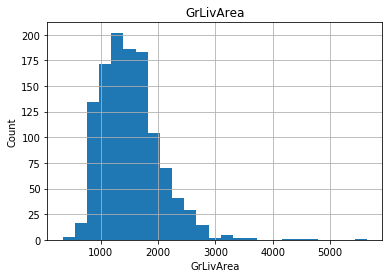

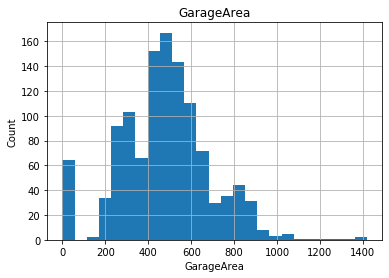

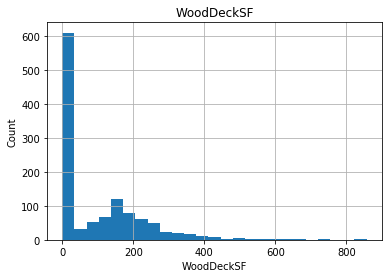

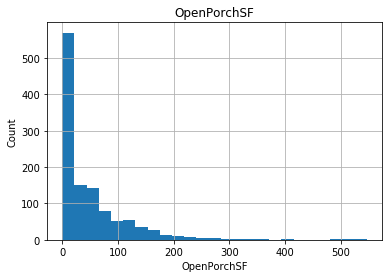

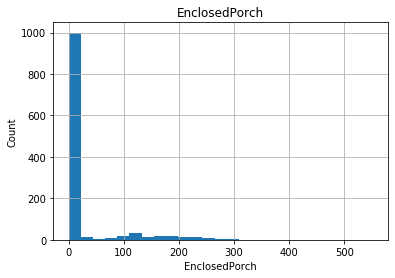

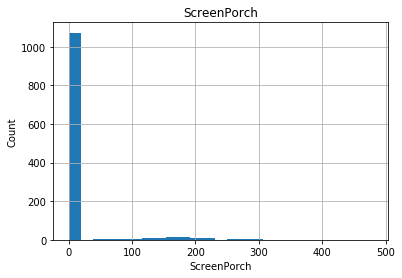

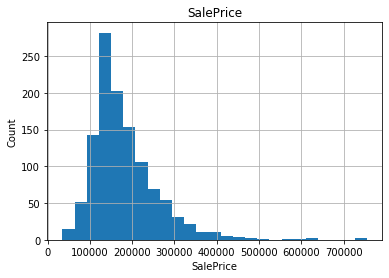

In [89]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

As we can clearly see that distribution of features is skewed and we have to handle the skewness of the distribution because we are working on a regression problem.

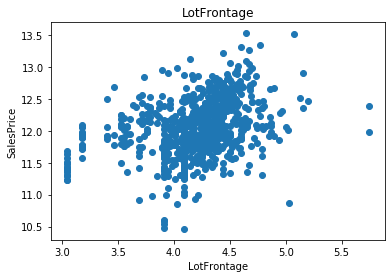

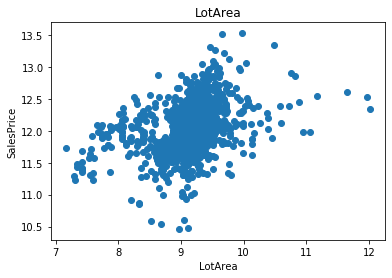

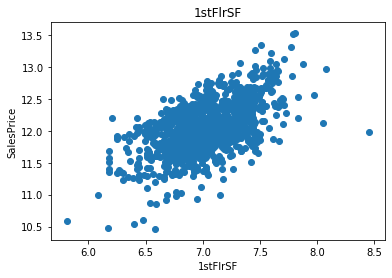

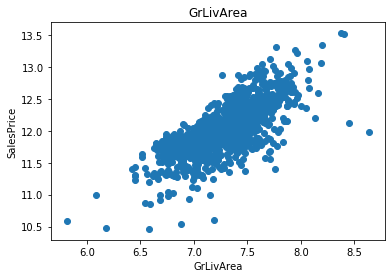

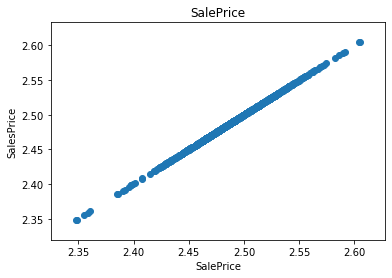

In [90]:
for feature in continuous_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data["SalePrice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalesPrice")
        plt.title(feature)
        plt.show()

## Outlier Analysis

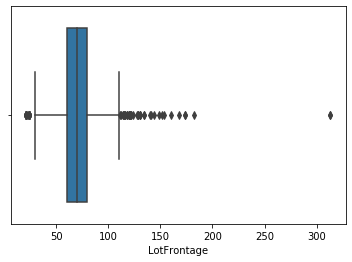

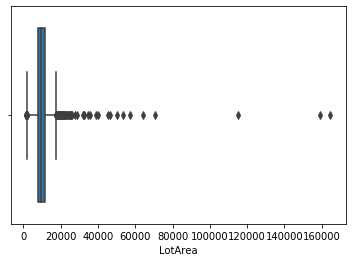

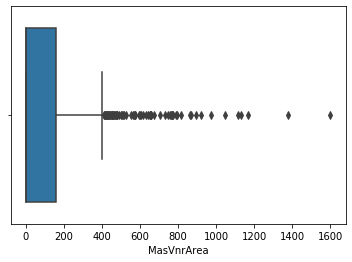

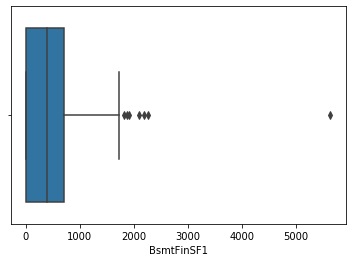

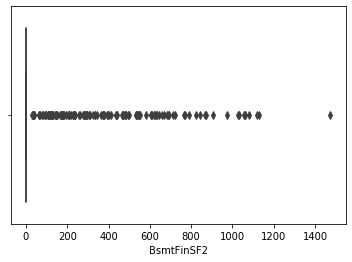

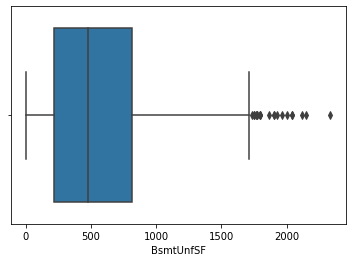

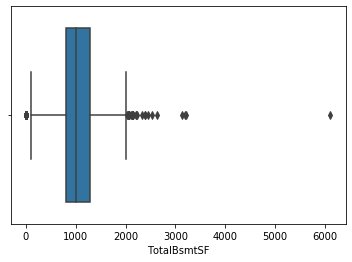

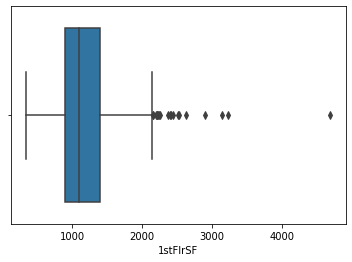

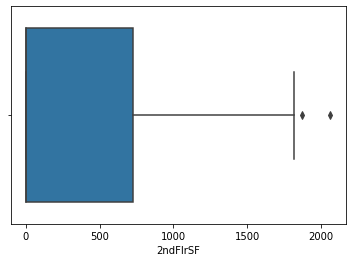

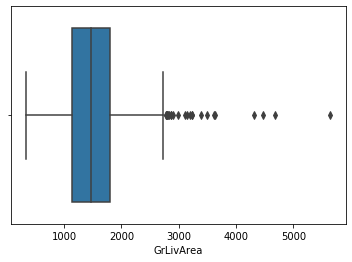

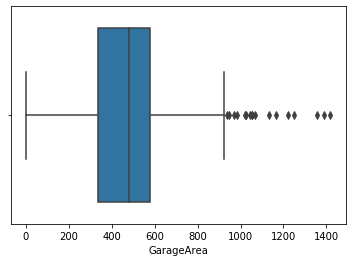

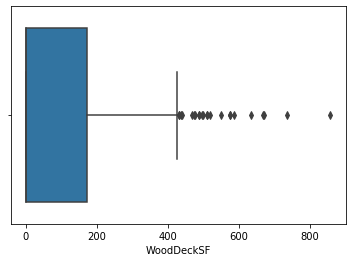

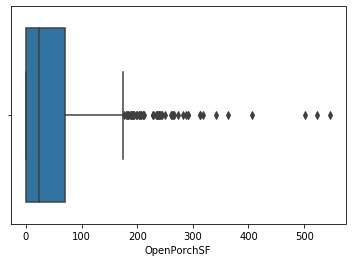

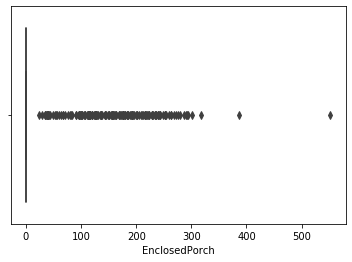

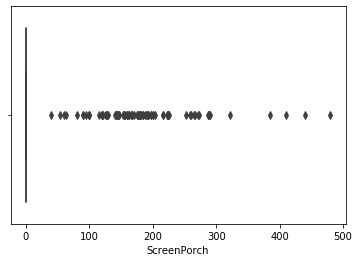

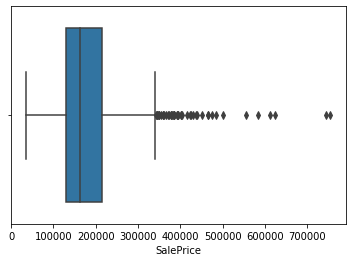

In [91]:
for feature in continuous_feature:
    plt.figure()
    sns.boxplot(x=train[feature])
    plt.show()

As we can see there are a lot of outliers in the dataset. We will handle these outliers in the feature engineering.

## Feature engineering

### Missing values

First of all we will check the missing values of the dataset and replace it with appropriate values.

In [92]:
# handling the missing values with categorical features
features_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes=='O']

We have figured out that features having missing values in categorical features. Now we will replace these missing vlaues. To perform this, we have to create a function which can iterate for all the features with missing values and will replace it with some "unknown" category. We will also apply the same transformation to the test dataset.

In [93]:
def replace_missing_cat(dataset,features_nan):
    data=train.copy()
    data[features_nan]=data[features_nan].fillna('Unknown')
    return data

In [94]:
train=replace_missing_cat(train,features_nan)
test=replace_missing_cat(test,features_nan)

Now will check the missing values for the numerical dataset. The missing values will be replaced with the median.

In [95]:
numerical_feat_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes!='O']

In [96]:
for feature in numerical_feat_nan:
    median_value=train[feature].median()
    
    train[feature+'nan']=np.where(train[feature].isnull(),1,0)
    train[feature].fillna(median_value,inplace=True)
    
    test[feature+'nan']=np.where(test[feature].isnull(),1,0)
    test[feature].fillna(median_value,inplace=True)
    

In [97]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,Unknown,0,2,2007,WD,Normal,128000,1,0,0
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,Unknown,0,10,2007,WD,Normal,268000,0,0,0
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,Unknown,0,6,2007,WD,Normal,269790,0,0,0
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,MnPrv,0,1,2010,COD,Normal,190000,0,0,0
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,Unknown,0,6,2009,WD,Normal,215000,1,0,0


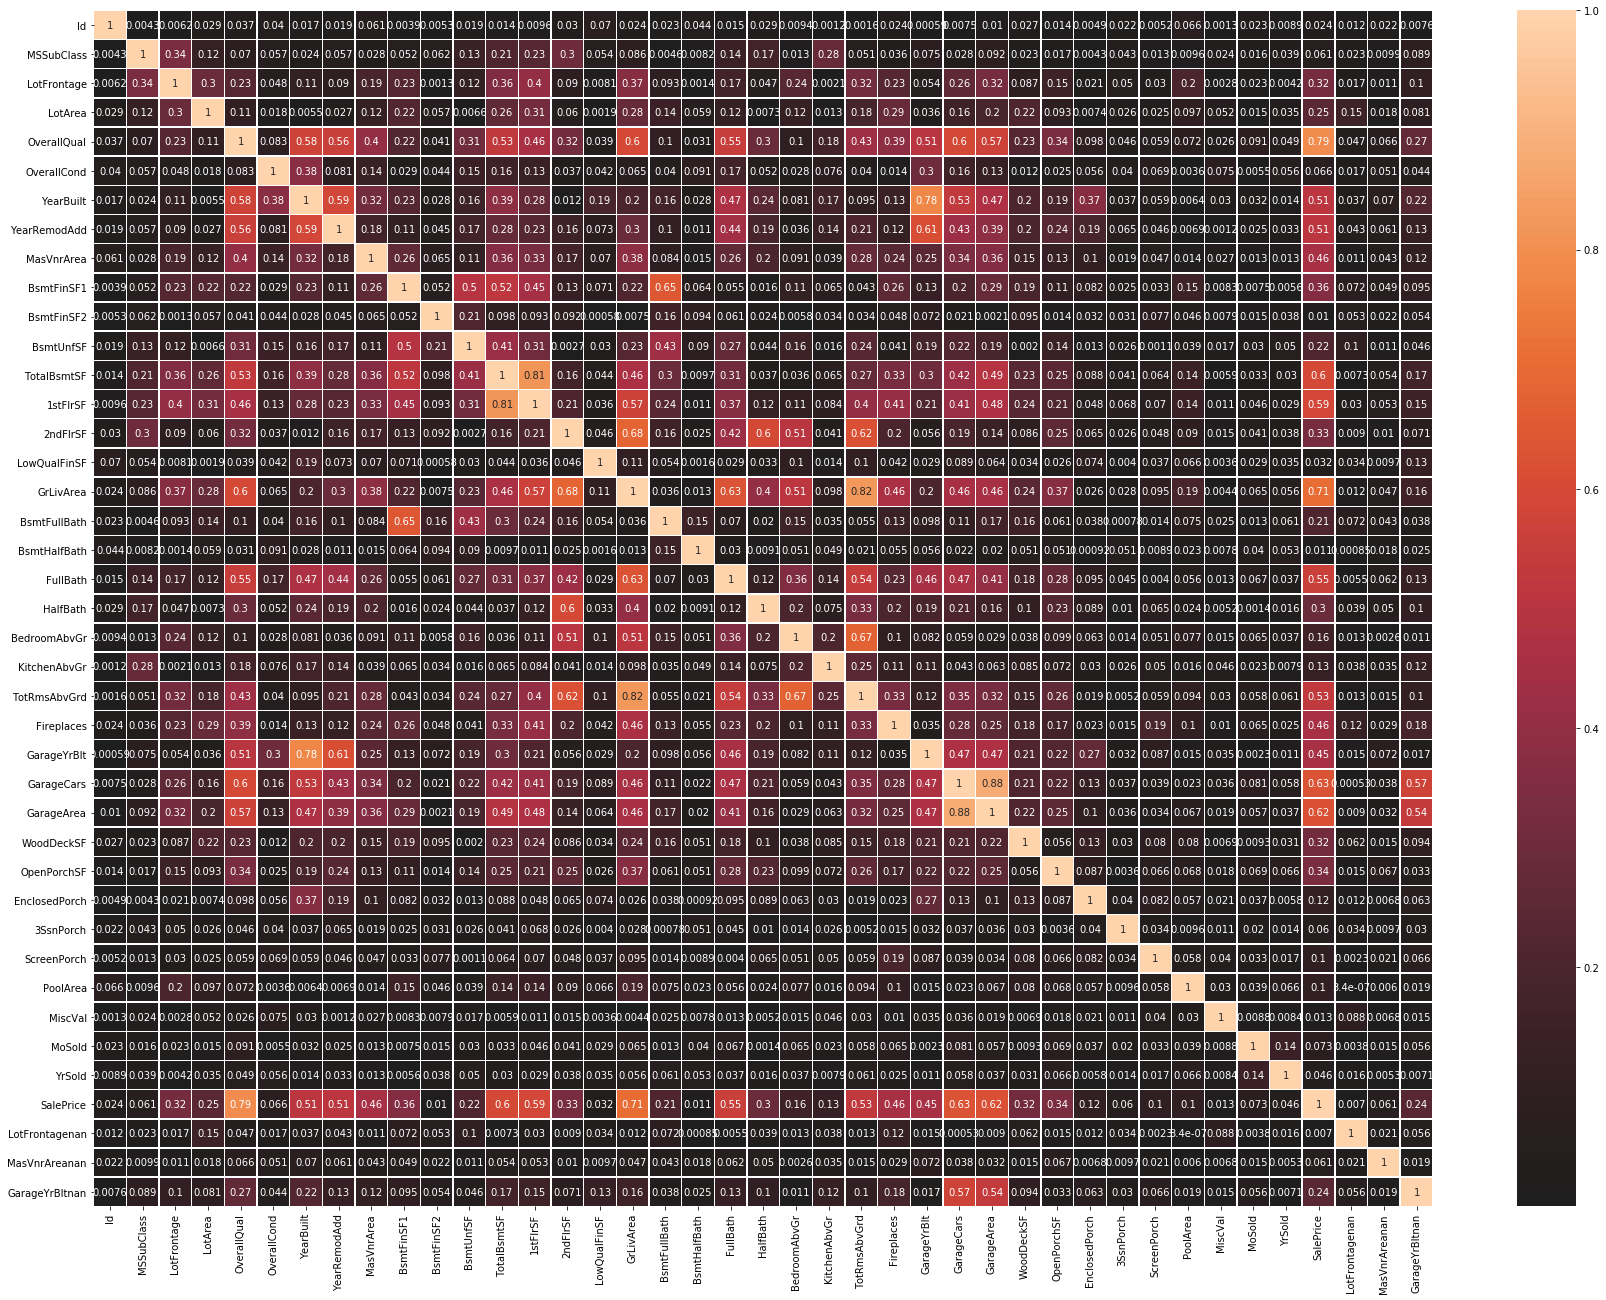

In [98]:
fig, ax = plt.subplots(figsize=(30,22))
corr_matrix = train.corr().abs()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax,center=0)

### Temporal features

We will convert year built of garage and remodification into age of that assignment.

In [99]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train[feature]=train['YrSold']-train[feature]
    test[feature]=test['YrSold']-test[feature]

In [100]:
train.drop(["Id"], inplace = True, axis = 1)
test.drop(["Id"], inplace = True, axis = 1)

In [103]:
# saving the final data
train.to_csv("train_final.csv")
test.to_csv("test_final.csv")

## Label Encoding

In [104]:
categorical_features=[feature for feature in train.columns if train[feature].dtype=='O']

for feature in categorical_features:
    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)
    test[feature]=test[feature].map(labels_ordered)

## Feature scaling

Since there are so many features having very different range of values. The machine learning algorithm will coverge better if we will convert all the features to the same scale.

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train.drop(["SalePrice"], axis = 1))
#test = scaler.transform(test.drop(["SalePrice"], axis = 1))

MinMaxScaler()

In [132]:
X_train = pd.DataFrame(scaler.transform(train.drop(["SalePrice"], axis = 1)), columns=test.drop(["SalePrice"], axis = 1).columns)
y_train = train["SalePrice"]
X_test = pd.DataFrame(scaler.transform(test.drop(["SalePrice"], axis = 1)), columns=test.drop(["SalePrice"], axis = 1).columns)
y_test = test["SalePrice"]

In [133]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,0.588235,0.75,0.167808,0.022209,1.0,0.333333,0.333333,0.0,0.25,0.0,...,0.0,1.0,0.0,0.090909,0.25,0.625,0.8,1.0,0.0,0.0
1,0.000000,0.75,0.253425,0.089159,1.0,0.333333,0.333333,0.0,0.25,0.5,...,0.0,1.0,0.0,0.818182,0.25,0.625,0.8,0.0,0.0,0.0
2,0.235294,0.75,0.243151,0.052767,1.0,0.333333,0.333333,0.0,1.00,0.0,...,0.0,1.0,0.0,0.454545,0.25,0.625,0.8,0.0,0.0,0.0
3,0.000000,0.75,0.287671,0.063975,1.0,0.333333,0.333333,0.0,0.25,0.0,...,0.0,0.5,0.0,0.000000,1.00,0.375,0.8,0.0,0.0,0.0
4,0.000000,0.75,0.167808,0.093872,1.0,0.333333,0.333333,0.0,0.00,0.0,...,0.0,1.0,0.0,0.454545,0.75,0.625,0.8,1.0,0.0,0.0


In [108]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [122]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.9, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.9, random_state=0))

In [134]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [135]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [136]:
X_train = X_train[selected_feat]
#y_train = X_train[selected_feat]
X_test = X_train[selected_feat]
#y_test = X_train[selected_feat]

In [142]:
#from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
score = LR.score(X_test, y_test)
score

0.8450613513779734

In [140]:
scores = cross_val_score(LR, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.81339265, 0.77038986, 0.57345703, 0.84666707, 0.82237253])

In [128]:
y = model.predict(X_test)

In [143]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)
score

1.0

In [157]:
from ml_metrics import rmse
rmse(y_test, y_pred_DT)

0.0

In [160]:
scores = cross_val_score(DT, X_test, y_test, scoring = "r2", cv = 5)
scores

array([0.83141691, 0.6864096 , 0.65907234, 0.78853969, 0.66885632])

In [151]:
y_pred_DT = DT.predict(X_test)
print(y_pred_DT)

[128000. 268000. 269790. ... 148500.  40000. 183200.]


In [150]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 550,
                           min_samples_split = 2,
                           min_samples_leaf = 2,
                           max_features = "auto",
                           max_depth = 25)
RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
accuracy

0.9731615347282746

In [161]:
scores = cross_val_score(RF, X_test, y_test, scoring = "r2", cv = 5)
scores

array([0.88899916, 0.80192224, 0.82891009, 0.89357494, 0.84824281])

In [162]:
# extracting feature importance using extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

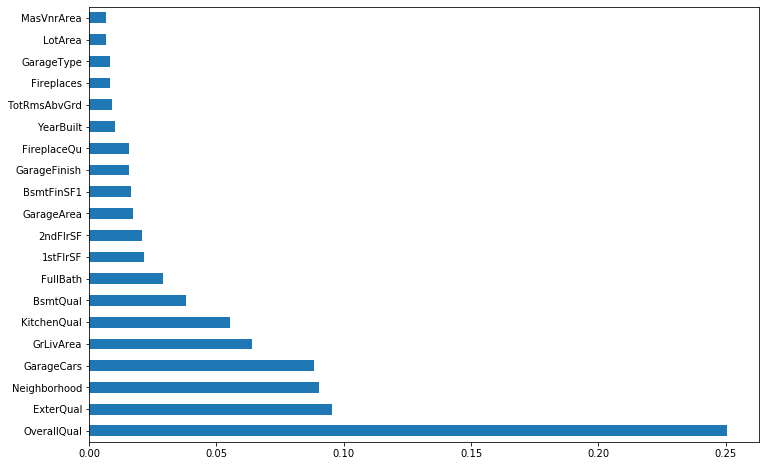

In [164]:
# plotting the feature importance 
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X_train.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

In [170]:
feat_importances.nlargest(20)

OverallQual     0.250390
ExterQual       0.095330
Neighborhood    0.090190
GarageCars      0.088462
GrLivArea       0.064134
KitchenQual     0.055521
BsmtQual        0.038186
FullBath        0.028916
1stFlrSF        0.021709
2ndFlrSF        0.020844
GarageArea      0.017107
BsmtFinSF1      0.016554
GarageFinish    0.015661
FireplaceQu     0.015645
YearBuilt       0.010074
TotRmsAbvGrd    0.009138
Fireplaces      0.008344
GarageType      0.008289
LotArea         0.006816
MasVnrArea      0.006654
dtype: float64

In [172]:
imp_feat = list(feat_importances.nlargest(20).index)

In [173]:
X_train = X_train[imp_feat]
#y_train = X_train[selected_feat]
X_test = X_train[imp_feat]
#y_test = X_train[selected_feat]

In [174]:
#from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
score = LR.score(X_test, y_test)
score

0.8083954137038296

In [175]:
scores = cross_val_score(LR, X_test, y_test, scoring = "r2", cv = 5)
scores

array([0.81517179, 0.77360701, 0.62942161, 0.8524419 , 0.80990511])

In [176]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 550,
                           min_samples_split = 2,
                           min_samples_leaf = 2,
                           max_features = "auto",
                           max_depth = 25)
RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
accuracy

0.9700557463926351

In [177]:
scores = cross_val_score(RF, X_test, y_test, scoring = "r2", cv = 5)
scores

array([0.88752234, 0.79830289, 0.83459509, 0.89237225, 0.84461126])

In [178]:
n_estimators = range(50,1000,50)
max_depth = range(5,30,5)
max_features = ["auto", "sqrt"]
min_sample_split = [2,5,10,20,50,100]
min_sample_leaf = [1,2,5,10]

param_dict = {
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "min_samples_split":min_sample_split,
    "min_samples_leaf":min_sample_leaf,
    "max_features":max_features,
}

from sklearn.model_selection import RandomizedSearchCV

RandomSearch = RandomizedSearchCV(estimator = RF, 
                                  param_distributions = param_dict,
                                  n_iter = 10, 
                                  cv = 5, 
                                  verbose=2,
                                  random_state=42,
                                  n_jobs=1)
RandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=550; total time=   3.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=550; total time=   3.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=25,
                                                   min_samples_leaf=2,
                                                   n_estimators=550),
                   n_jobs=1,
                   param_distributions={'max_depth': range(5, 30, 5),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50,
                                                              100],
                                        'n_estimators': range(50, 1000, 50)},
                   random_state=42, verbose=2)